# iPHONE PURCHASE RECORDS ANALYSIS

In [1]:
# importing the packages--
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sklearn.neighbors as sn
import sklearn.metrics as sm

In [2]:
# reading the data file--
def read_data():
    data = pd.read_csv(r"D:\Master in Data Science\Python\Projects\KNN_Project_5&6\KNN Assignment/iphone_purchase_records.csv")
    return data

In [3]:
# calling the function--
data= read_data()
print(data.head(2))

  Gender  Age  Salary  Purchase Iphone
0   Male   19   19000                0
1   Male   35   20000                0


In [4]:
# copying the data--
data=data.copy()
data

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [5]:
# data analysis--
data.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [6]:
# checking the missing values--
data.isnull().sum()

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

In [7]:
data.describe()

,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [9]:
data.corr()

,Age,Salary,Purchase Iphone
Age,1.000000,0.155238,0.622454
Salary,0.155238,1.000000,0.362083
Purchase Iphone,0.622454,0.362083,1.000000


# Exploratory Data Analysis

<Axes: >

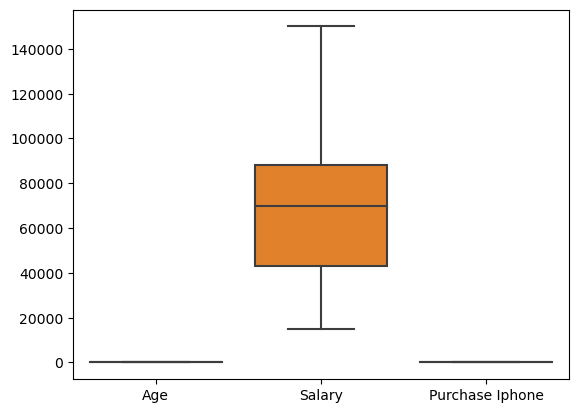

In [10]:
# checking the outliers--
sns.boxplot(data)

<Axes: ylabel='Age'>

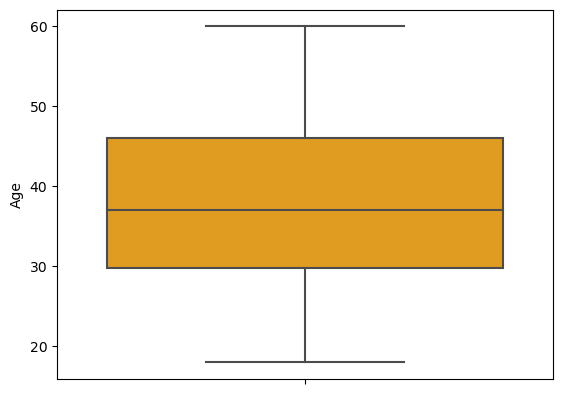

In [11]:
sns.boxplot(y='Age',color='orange',data=data)

<Axes: ylabel='Salary'>

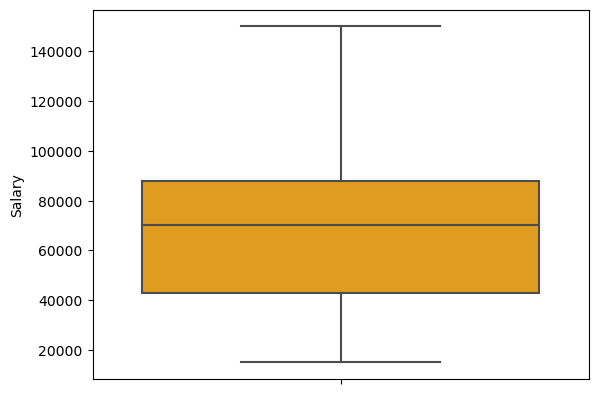

In [12]:
sns.boxplot(y='Salary',color='orange',data=data)

<Axes: xlabel='Gender', ylabel='Age'>

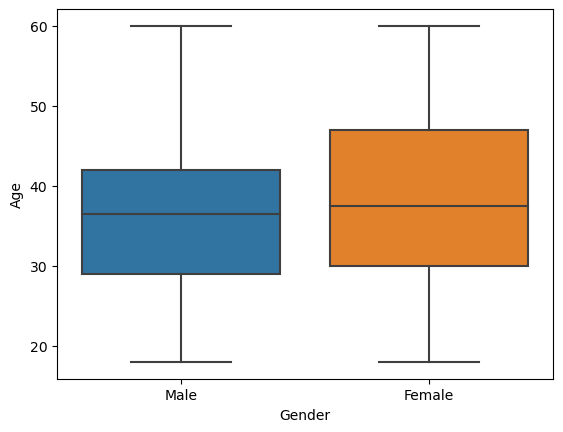

In [13]:
sns.boxplot(x='Gender',y='Age',data=data)

<Axes: xlabel='Gender', ylabel='Salary'>

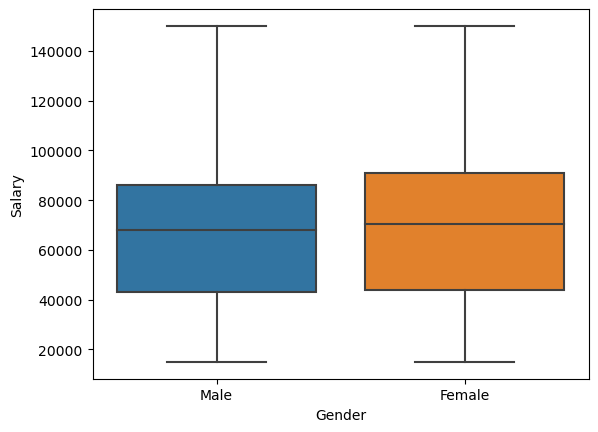

In [14]:
sns.boxplot(x='Gender',y='Salary',data=data)

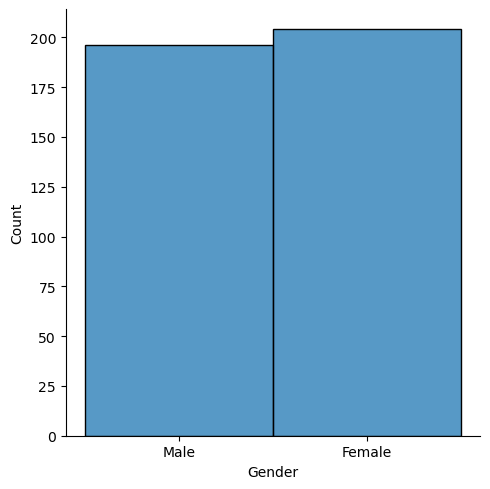

In [15]:
sns.displot(x='Gender',data=data)

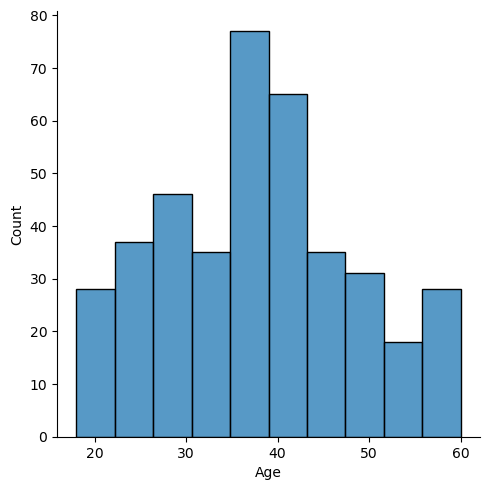

In [16]:
sns.displot(x='Age',data=data)

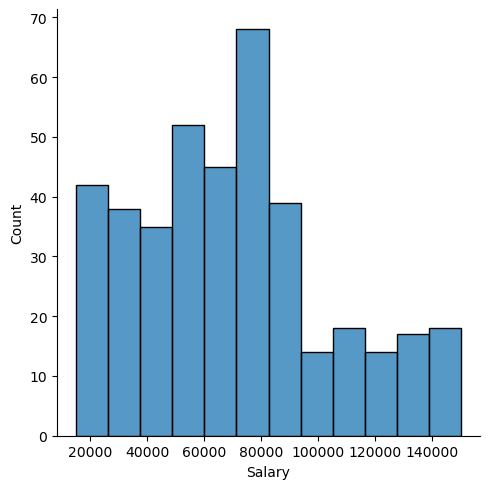

In [17]:
sns.displot(x='Salary',data=data)

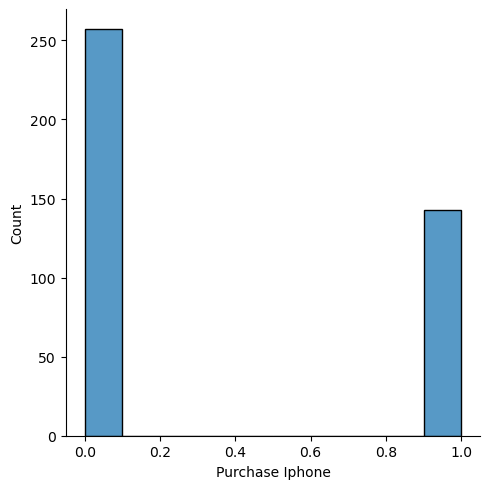

In [18]:
sns.displot(x='Purchase Iphone',data=data)

<Axes: >

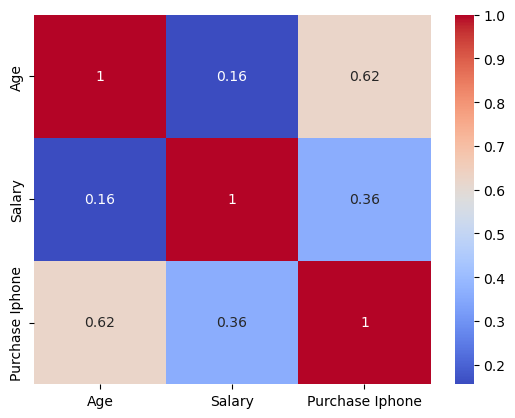

In [19]:
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")

In [20]:
female = data[data['Gender']=='Female']
female

,Gender,Age,Salary,Purchase Iphone
2,Female,26,43000,0
3,Female,27,57000,0
6,Female,27,84000,0
7,Female,32,150000,1
9,Female,35,65000,0
...,...,...,...,...
392,Female,45,45000,1
394,Female,39,59000,0
395,Female,46,41000,1
397,Female,50,20000,1


In [21]:
male = data[data['Gender']=='Male']
male

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
4,Male,19,76000,0
5,Male,27,58000,0
8,Male,25,33000,0
...,...,...,...,...
390,Male,48,33000,1
391,Male,47,23000,1
393,Male,60,42000,1
396,Male,51,23000,1


In [22]:
female.describe()

,Age,Salary,Purchase Iphone
count,204.000000,204.000000,204.000000
mean,38.411765,71759.803922,0.377451
std,10.859019,35595.236189,0.485942
min,18.000000,15000.000000,0.000000
25%,30.000000,44000.000000,0.000000
50%,37.500000,70500.000000,0.000000
75%,47.000000,90750.000000,1.000000
max,60.000000,150000.000000,1.000000


In [23]:
male.describe()

,Age,Salary,Purchase Iphone
count,196.000000,196.000000,196.000000
mean,36.867347,67642.857143,0.336735
std,10.043636,32421.819181,0.473804
min,18.000000,15000.000000,0.000000
25%,29.000000,43000.000000,0.000000
50%,36.500000,68000.000000,0.000000
75%,42.000000,86000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [24]:
female['Purchase Iphone'].value_counts()

0    127
1     77
Name: Purchase Iphone, dtype: int64

In [25]:
(77*100)/204

37.745098039215684

In [26]:
male['Purchase Iphone'].value_counts()

0    130
1     66
Name: Purchase Iphone, dtype: int64

In [27]:
(66*100)/196

33.673469387755105

In [28]:
female['Age'].unique()

array([26, 27, 32, 35, 48, 47, 45, 21, 28, 33, 31, 24, 18, 29, 23, 59, 22,
       20, 30, 19, 38, 39, 37, 36, 40, 41, 34, 58, 55, 52, 46, 60, 42, 53,
       50, 56, 51, 57, 44, 43, 49, 54], dtype=int64)

In [29]:
male['Age'].unique()

array([19, 35, 27, 25, 20, 32, 18, 29, 47, 45, 46, 48, 49, 31, 30, 23, 28,
       22, 24, 34, 39, 26, 21, 38, 37, 42, 40, 36, 41, 33, 52, 59, 60, 56,
       57, 55, 58, 53, 54, 43, 51], dtype=int64)

# KNN

<li>1st Model

In [30]:
data.columns

Index(['Gender', 'Age', 'Salary', 'Purchase Iphone'], dtype='object')

In [31]:
x = data[['Age', 'Salary']]
y = data[['Purchase Iphone']]

In [32]:
acc=[]
for i in range(1,21):
    knn=sn.KNeighborsClassifier(n_neighbors=i)
    model= knn.fit(x,y)
    pred_y = model.predict(x)
    acc.append(sm.accuracy_score(pred_y,y))
    print('k=',i,acc)

k= 1 [0.995]
k= 2 [0.995, 0.9]
k= 3 [0.995, 0.9, 0.8975]
k= 4 [0.995, 0.9, 0.8975, 0.8625]
k= 5 [0.995, 0.9, 0.8975, 0.8625, 0.8725]
k= 6 [0.995, 0.9, 0.8975, 0.8625, 0.8725, 0.8625]
k= 7 [0.995, 0.9, 0.8975, 0.8625, 0.8725, 0.8625, 0.87]
k= 8 [0.995, 0.9, 0.8975, 0.8625, 0.8725, 0.8625, 0.87, 0.8475]
k= 9 [0.995, 0.9, 0.8975, 0.8625, 0.8725, 0.8625, 0.87, 0.8475, 0.8725]
k= 10 [0.995, 0.9, 0.8975, 0.8625, 0.8725, 0.8625, 0.87, 0.8475, 0.8725, 0.8475]
k= 11 [0.995, 0.9, 0.8975, 0.8625, 0.8725, 0.8625, 0.87, 0.8475, 0.8725, 0.8475, 0.8325]
k= 12 [0.995, 0.9, 0.8975, 0.8625, 0.8725, 0.8625, 0.87, 0.8475, 0.8725, 0.8475, 0.8325, 0.825]
k= 13 [0.995, 0.9, 0.8975, 0.8625, 0.8725, 0.8625, 0.87, 0.8475, 0.8725, 0.8475, 0.8325, 0.825, 0.845]
k= 14 [0.995, 0.9, 0.8975, 0.8625, 0.8725, 0.8625, 0.87, 0.8475, 0.8725, 0.8475, 0.8325, 0.825, 0.845, 0.8425]
k= 15 [0.995, 0.9, 0.8975, 0.8625, 0.8725, 0.8625, 0.87, 0.8475, 0.8725, 0.8475, 0.8325, 0.825, 0.845, 0.8425, 0.8325]
k= 16 [0.995, 0.9, 0.8975,

In [33]:
max(acc)
0.995
k=acc.index(max(acc))+1
k
1
knn=sn.KNeighborsClassifier(n_neighbors=1)
model= knn.fit(x,y)

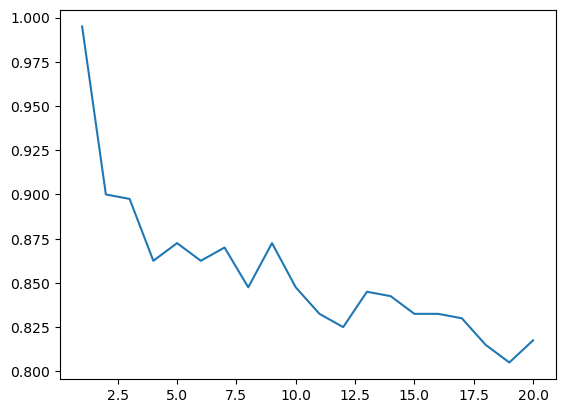

In [34]:
plt.plot(range(1,21),acc)

## 2nd Model

In [35]:
m=data.groupby('Gender')['Purchase Iphone'].mean()
m

Gender
Female    0.377451
Male      0.336735
Name: Purchase Iphone, dtype: float64

In [36]:
q=m.sum()
q

0.7141856742697079

In [37]:
(m/q)*100

Gender
Female    52.850539
Male      47.149461
Name: Purchase Iphone, dtype: float64

In [40]:
d = {'Female':52.850539,'Male':47.149461}
data['gm']=data['Gender'].map(d)
x = data[['Age', 'Salary','gm']]
y = data[['Purchase Iphone']]

In [41]:
acc=[]
for i in range(1,20):
    knn=sn.KNeighborsClassifier(n_neighbors=i)
    model= knn.fit(x,y)
    pred_y = model.predict(x)
    acc.append(sm.accuracy_score(pred_y,y))
    print('k=',i,acc)

k= 1 [0.9975]
k= 2 [0.9975, 0.8975]
k= 3 [0.9975, 0.8975, 0.8975]
k= 4 [0.9975, 0.8975, 0.8975, 0.8625]
k= 5 [0.9975, 0.8975, 0.8975, 0.8625, 0.875]
k= 6 [0.9975, 0.8975, 0.8975, 0.8625, 0.875, 0.8625]
k= 7 [0.9975, 0.8975, 0.8975, 0.8625, 0.875, 0.8625, 0.87]
k= 8 [0.9975, 0.8975, 0.8975, 0.8625, 0.875, 0.8625, 0.87, 0.855]
k= 9 [0.9975, 0.8975, 0.8975, 0.8625, 0.875, 0.8625, 0.87, 0.855, 0.865]
k= 10 [0.9975, 0.8975, 0.8975, 0.8625, 0.875, 0.8625, 0.87, 0.855, 0.865, 0.8475]
k= 11 [0.9975, 0.8975, 0.8975, 0.8625, 0.875, 0.8625, 0.87, 0.855, 0.865, 0.8475, 0.835]
k= 12 [0.9975, 0.8975, 0.8975, 0.8625, 0.875, 0.8625, 0.87, 0.855, 0.865, 0.8475, 0.835, 0.8275]
k= 13 [0.9975, 0.8975, 0.8975, 0.8625, 0.875, 0.8625, 0.87, 0.855, 0.865, 0.8475, 0.835, 0.8275, 0.8425]
k= 14 [0.9975, 0.8975, 0.8975, 0.8625, 0.875, 0.8625, 0.87, 0.855, 0.865, 0.8475, 0.835, 0.8275, 0.8425, 0.8475]
k= 15 [0.9975, 0.8975, 0.8975, 0.8625, 0.875, 0.8625, 0.87, 0.855, 0.865, 0.8475, 0.835, 0.8275, 0.8425, 0.8475, 0

In [42]:
max(acc)
0.9975
k=acc.index(max(acc))+1
k
1
knn=sn.KNeighborsClassifier(n_neighbors=1)
model= knn.fit(x,y)

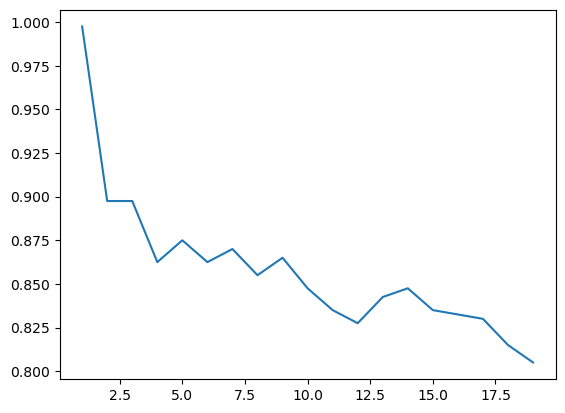

In [43]:
plt.plot(range(1,20),acc)

### 2nd Model more accurate than 1st Model because accuracy score of 2nd Model is closer to 1 for k=1

# Gender - wise Model

## Female

In [44]:
female

,Gender,Age,Salary,Purchase Iphone
2,Female,26,43000,0
3,Female,27,57000,0
6,Female,27,84000,0
7,Female,32,150000,1
9,Female,35,65000,0
...,...,...,...,...
392,Female,45,45000,1
394,Female,39,59000,0
395,Female,46,41000,1
397,Female,50,20000,1


In [45]:
x = female[['Age', 'Salary']]
y = female[['Purchase Iphone']]

In [46]:
acc = []
for i in range(1,21):
    knn=sn.KNeighborsClassifier(n_neighbors=i)
    model=knn.fit(x,y)
    predy=model.predict(x)
    acc.append(sm.accuracy_score(predy,y))
    print('k=',i,acc)

k= 1 [0.9950980392156863]
k= 2 [0.9950980392156863, 0.8774509803921569]
k= 3 [0.9950980392156863, 0.8774509803921569, 0.8676470588235294]
k= 4 [0.9950980392156863, 0.8774509803921569, 0.8676470588235294, 0.8529411764705882]
k= 5 [0.9950980392156863, 0.8774509803921569, 0.8676470588235294, 0.8529411764705882, 0.8382352941176471]
k= 6 [0.9950980392156863, 0.8774509803921569, 0.8676470588235294, 0.8529411764705882, 0.8382352941176471, 0.8235294117647058]
k= 7 [0.9950980392156863, 0.8774509803921569, 0.8676470588235294, 0.8529411764705882, 0.8382352941176471, 0.8235294117647058, 0.8529411764705882]
k= 8 [0.9950980392156863, 0.8774509803921569, 0.8676470588235294, 0.8529411764705882, 0.8382352941176471, 0.8235294117647058, 0.8529411764705882, 0.8333333333333334]
k= 9 [0.9950980392156863, 0.8774509803921569, 0.8676470588235294, 0.8529411764705882, 0.8382352941176471, 0.8235294117647058, 0.8529411764705882, 0.8333333333333334, 0.8186274509803921]
k= 10 [0.9950980392156863, 0.8774509803921569,

In [47]:
max(acc)
0.9950980392156863
k = acc.index(max(acc))+1
k
1
knn=sn.KNeighborsClassifier(n_neighbors=1)
model=knn.fit(x,y)

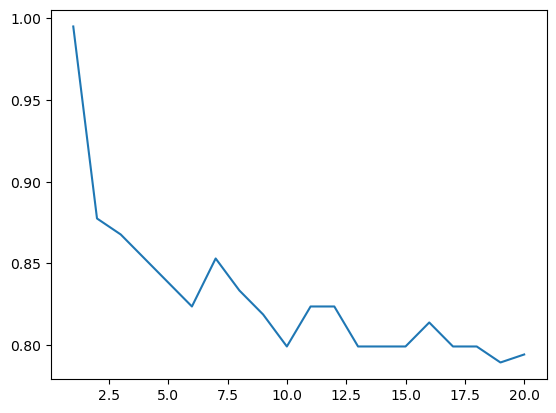

In [48]:
plt.plot(range(1,21),acc)

## Male

In [49]:
male

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
4,Male,19,76000,0
5,Male,27,58000,0
8,Male,25,33000,0
...,...,...,...,...
390,Male,48,33000,1
391,Male,47,23000,1
393,Male,60,42000,1
396,Male,51,23000,1


In [50]:
x = male[['Age', 'Salary']]
y = male[['Purchase Iphone']]

In [51]:
acc = []
for i in range(1,21):
    knn=sn.KNeighborsClassifier(n_neighbors=i)
    model=knn.fit(x,y)
    predy=model.predict(x)
    acc.append(sm.accuracy_score(predy,y))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.8979591836734694]
k= 3 [1.0, 0.8979591836734694, 0.8673469387755102]
k= 4 [1.0, 0.8979591836734694, 0.8673469387755102, 0.826530612244898]
k= 5 [1.0, 0.8979591836734694, 0.8673469387755102, 0.826530612244898, 0.8826530612244898]
k= 6 [1.0, 0.8979591836734694, 0.8673469387755102, 0.826530612244898, 0.8826530612244898, 0.8571428571428571]
k= 7 [1.0, 0.8979591836734694, 0.8673469387755102, 0.826530612244898, 0.8826530612244898, 0.8571428571428571, 0.8622448979591837]
k= 8 [1.0, 0.8979591836734694, 0.8673469387755102, 0.826530612244898, 0.8826530612244898, 0.8571428571428571, 0.8622448979591837, 0.8469387755102041]
k= 9 [1.0, 0.8979591836734694, 0.8673469387755102, 0.826530612244898, 0.8826530612244898, 0.8571428571428571, 0.8622448979591837, 0.8469387755102041, 0.826530612244898]
k= 10 [1.0, 0.8979591836734694, 0.8673469387755102, 0.826530612244898, 0.8826530612244898, 0.8571428571428571, 0.8622448979591837, 0.8469387755102041, 0.826530612244898, 0.826530612244898]

In [52]:
max(acc)
1.0
k = acc.index(max(acc))+1
k
1
knn=sn.KNeighborsClassifier(n_neighbors=1)
model=knn.fit(x,y)

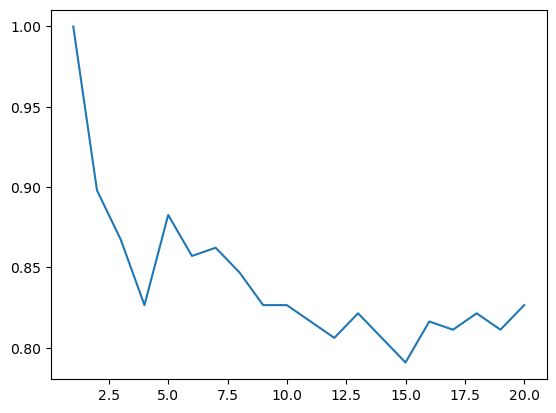

In [53]:
plt.plot(range(1,21),acc)